In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [83]:
import os
from scipy.io import loadmat 
from PIL import Image

In [18]:
dir_data_DCE = '/Users/enhao/Documents/Research/MRI/GANCS/data_MRI/processed_data'
dir_mask_DCE = '/Users/enhao/Documents/Research/MRI/GANCS/data_MRI/sampling_pattern/'

In [5]:
list_filename_data = [x for x in os.listdir(dir_data_DCE) if x.endswith('.mat')]
list_filename_data

['image_3d_30Sep16_Ex3888_Ser6.mat',
 'image_3d_30Sep16_Ex3888_Ser7.mat',
 'image_3d_31Mar16_Ex18773_Ser8.mat']

In [9]:
for filename_data in list_filename_data:
    filepath_data = os.path.join(dir_data_DCE, filename_data)

In [72]:
content_mat=loadmat(filepath_data)
content_mat.keys()

['image_recon_interp', '__version__', '__header__', '__globals__']

In [74]:
data=content_mat['image_recon_interp']
data=data/(np.max(data[:])+1e-6)
data.shape

(151, 200, 100)

In [77]:
from IPython import display
import time
def display_dynamic_3d(data, delay=0.005, indexes_slice=[], display_axis=[0,1,2]):
#     plt.figure()
    data = np.transpose(data,display_axis)
    num_slice=data.shape[0]
    if len(indexes_slice)==0:
        indexes_slice=xrange(num_slice)
    for index_slice in indexes_slice:
        data_slice = np.squeeze(data[index_slice,:,:])
        plt.imshow(data_slice,clim=[0.01,0.99],cmap='gray')
        plt.title('slice#{0}'.format(index_slice))
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(delay)
    display.clear_output(wait=True)        
    return None

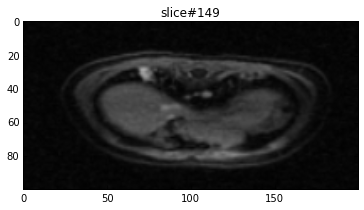

In [81]:
display_dynamic_3d(data,indexes_slice=xrange(140,150),display_axis=[0,2,1])

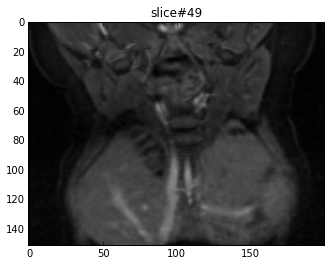

In [66]:
display_dynamic_3d(data,indexes_slice=xrange(30,50),display_axis=[2,1,0])

## undersample

In [16]:
import tensorflow as tf

In [19]:
list_filename_mask = [x for x in os.listdir(dir_mask_DCE) if x.endswith('.mat')]
list_filename_mask

['mask_2dvardesnity_radiaview_10fold.mat',
 'mask_2dvardesnity_radiaview_4fold.mat']

In [20]:
content_mask=loadmat(os.path.join(dir_mask_DCE,'mask_2dvardesnity_radiaview_4fold.mat' ))

In [22]:
mask = content_mask['mask_2dvardesnity_radiaview_4fold']
mask.shape

(200, 100)

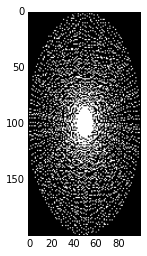

In [68]:
plt.imshow(mask,cmap='gray')

## generate slice images

In [71]:
dir_image_DCE='/Users/enhao/Documents/Research/MRI/GANCS/data_MRI/generated_slices_jpg'
# dir_image_input = '/home/enhaog/GANCS/srez/dataset_MRI/DCE'
# save png
try:
    os.mkdir(dir_image_DCE)
    print('created')
except:
    print('exist')

exist


In [75]:
filename_data

'image_3d_31Mar16_Ex18773_Ser8.mat'

In [87]:
# generate images
indexes_slice=xrange(0,151)
for filename_data in list_filename_data:
    # load data
    filepath_data = os.path.join(dir_data_DCE, filename_data)
    content_mat=loadmat(filepath_data)
    key_mat=[x for x in content_mat.keys() if not x.startswith('_')]
    try:
        data=content_mat[key_mat[0]]
        assert(np.ndim(data)==3)
    except:
        continue
    print('image load from {0}, size {1}'.format(filename_data, data.shape))
    # scale
    data=data/(np.max(data[:])+1e-6)    
    # each slice
    num_slice=data.shape[0]
    indexes_slice=xrange(num_slice)
    for index_slice in indexes_slice:
        data_slice = np.squeeze(data[index_slice,:,:])
        # save to image
        obj = Image.fromarray((data_slice*255).astype('uint8'))
        filename_image = '{0}_slice{1:03d}.jpg'.format(filename_data.split('.mat')[0],index_slice)
        obj.save(os.path.join(dir_image_DCE, filename_image))
        if index_slice%100 == 0:
            print('save to {}'.format(filename_image))              

print('DCE data generated to images to folder:{0}'.format(
		dir_image_DCE))

image load from image_3d_30Sep16_Ex3888_Ser6.mat, size (151, 200, 100)
save to image_3d_30Sep16_Ex3888_Ser6_slice000.jpg
save to image_3d_30Sep16_Ex3888_Ser6_slice100.jpg
image load from image_3d_30Sep16_Ex3888_Ser7.mat, size (151, 200, 100)
save to image_3d_30Sep16_Ex3888_Ser7_slice000.jpg
save to image_3d_30Sep16_Ex3888_Ser7_slice100.jpg
image load from image_3d_31Mar16_Ex18773_Ser8.mat, size (151, 200, 100)
save to image_3d_31Mar16_Ex18773_Ser8_slice000.jpg
save to image_3d_31Mar16_Ex18773_Ser8_slice100.jpg
DCE data generated to images to folder:/Users/enhao/Documents/Research/MRI/GANCS/data_MRI/generated_slices_jpg
